In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import cv2

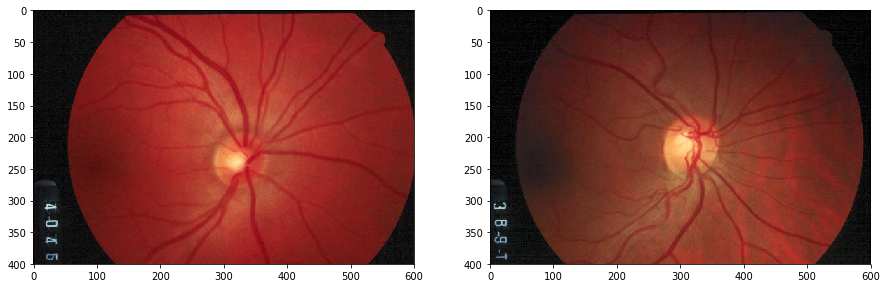

In [7]:
img_001 = cv2.imread('C:/Users/SOUMEN/Desktop/pdf/ds and ml/DRIONS-DB/images/image_001.jpg')
img_040 = cv2.imread('C:/Users/SOUMEN/Desktop/pdf/ds and ml/DRIONS-DB/images/image_040.jpg')
pic1=cv2.cvtColor(img_001, cv2.COLOR_BGR2RGB)
pic2=cv2.cvtColor(img_040, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1,2, figsize = (15,9))
ax[0].imshow(pic1) 
ax[1].imshow(pic2) 

In [8]:
img_001.shape
#img

(400, 600, 3)

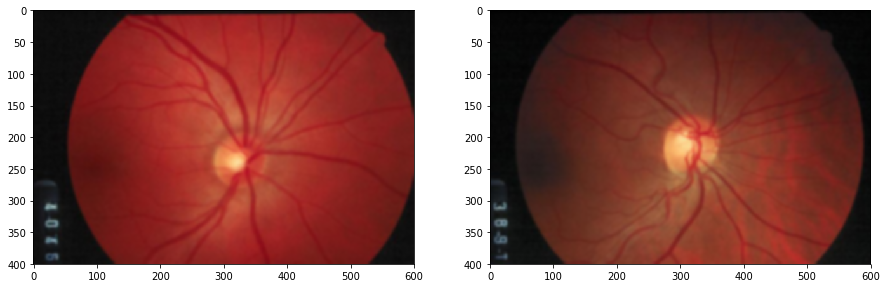

In [9]:
pic1 = cv2.GaussianBlur(pic1, (11,11), 0)
pic2 = cv2.GaussianBlur(pic2, (11,11), 0)
fig, ax = plt.subplots(1,2, figsize = (15,9))
#ax[0].imshow(pic1[:,:,0]) 
#ax[1].imshow(pic2[:,:,2]) 
ax[0].imshow(pic1) 
ax[1].imshow(pic2) 

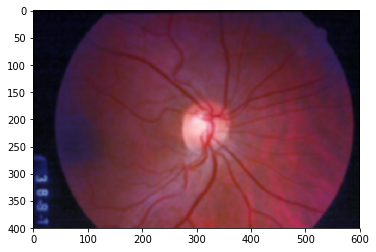

In [10]:
pic2_=cv2.cvtColor(pic2, cv2.COLOR_BGR2RGB)
r,g,b=cv2.split(pic2_)
clahe = cv2.createCLAHE(clipLimit=3, tileGridSize=(5,5))
img_rgb= clahe.apply(r)
cnst_pic=cv2.cvtColor(cv2.merge((img_rgb,g,b)), cv2.COLOR_BGR2RGB)
plt.imshow(cnst_pic)

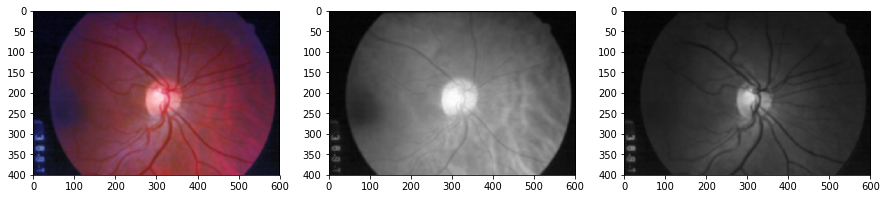

In [12]:
red_channel=cnst_pic[:,:,0]
green_channel=cnst_pic[:,:,1]
cv2.imwrite('C:/Users/SOUMEN/Desktop/pdf/ds and ml/DRIONS-DB/channel_image/image_040r.jpg',red_channel)
cv2.imwrite('C:/Users/SOUMEN/Desktop/pdf/ds and ml/DRIONS-DB/channel_image/image_040g.jpg',green_channel)
img_r = cv2.imread(r'C:\Users\SOUMEN\Desktop\pdf\ds and ml\DRIONS-DB\channel_image/image_040r.jpg')
img_g = cv2.imread(r'C:\Users\SOUMEN\Desktop\pdf\ds and ml\DRIONS-DB\channel_image/image_040g.jpg')
fig, ax = plt.subplots(1,3, figsize = (15,12))
ax[0].imshow(cnst_pic) 
ax[1].imshow(img_r) 
ax[2].imshow(img_g)

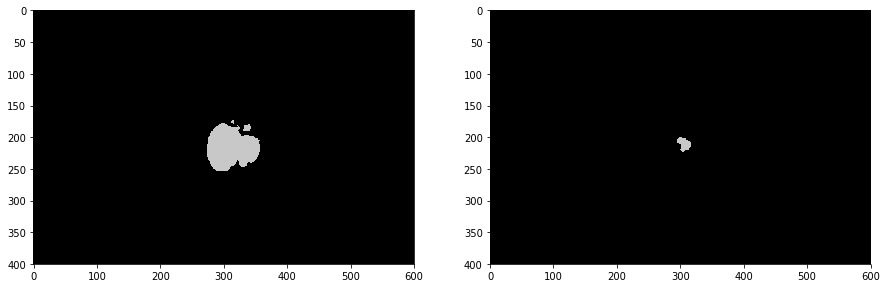

In [13]:
ret,thresh1 = cv2.threshold(img_r,201,200,cv2.THRESH_BINARY)
ret,thresh4 = cv2.threshold(img_g,201,200,cv2.THRESH_BINARY)
fig, ax = plt.subplots(1,2, figsize = (15,9))
ax[0].imshow(thresh1) 
ax[1].imshow(thresh4)

In [14]:
image, contours, hierarchy = cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


cnt = contours
(x,y),radius = cv2.minEnclosingCircle(contours)
center = (int(x),int(y))
radius = int(radius)
img = cv2.circle(img_r,center,radius,(0,255,0),2)

cv2.drawContours(thresh1, contours, -1, (255, 0, 0), 1)
plt.imshow(img)

error: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\imgproc\src\contours.cpp:199: error: (-210) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function cvStartFindContours_Impl
